In [3]:
import numpy as np
from helpers import *
from implementations import *
from data_processing import *
from hyperparams import *
from classification import *
# from classification import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
#%reload_ext autoreload # run this when want to update changes in a function

In [5]:
# loading train data (takes 10 secs, avoid spamming cell)
yb, input_data, ids = load_csv_data("train.csv")
dimensions = np.shape(input_data)
N = dimensions[0]
P = dimensions[1]
yb = np.reshape(yb,[N,1])
yb[yb==-1] = 0


In [6]:
# standardize data without the incomplete points, calculations done on _rem arrays (with -999 lines removed)
y_rem, tx_rem_std = standardize_data_removed(yb,input_data)
tx_means_std = standardize_data_mean(input_data)

tx_rem_std = add_w0(tx_rem_std,tx_rem_std.shape[0])   
tx_means_std = add_w0(tx_means_std,N)   

In [7]:
tx_reduced = tx_rem_std[range(1000),:]  # 100x30 data for faster testing of regression
y_reduced = yb[0:1000]
ratio = 0.8

y_tr, x_tr, y_te, x_te = split_data(y_reduced,tx_reduced,ratio)

In [8]:
initial_w = np.zeros([31,1])   
max_iters = 50
gamma = 0.4
w_opt,loss = logistic_regression(y_tr,x_tr,initial_w,max_iters,gamma)

In [9]:
np.shape(initial_w)
np.shape(w_opt)
print(loss)              #"PROBLEM nan"

0.6332570895771211


For polynomial expansion up to degree 3, the choice of lambda which leads to the best test rmse is 0.00026 with a test rmse of 0.629
0.6294777518061055


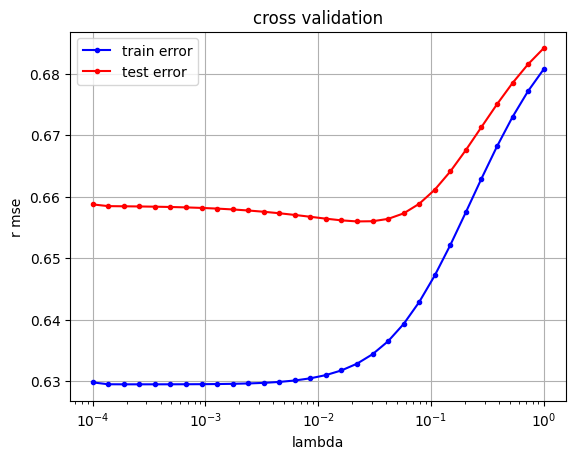

In [10]:
best_lambda, best_rmse = cross_validation_demo(y_reduced, tx_reduced, 7, 4, initial_w,  np.logspace(-4, 0, 30), 3 ,gamma, max_iters)
print(best_rmse)

In [11]:
# Construct the matrix with the polynomial expansion for each column
size_x_tr = x_tr.shape[0]
gamma = 0.4 #Quite low to avoid NaN
lambdas = np.logspace(-2, -1.8, 20) #the lambda tested for the logistic regression, for each lambda we test each degree
initial_w = np.ones([size_x_tr,1])
max_iters = 20
degrees_tested = [1,2,3,5,6,8] #the degrees tested for the polynoms
phi, degrees_poly = phi_optimized(y_tr,x_tr,degrees_tested,P, 4, initial_w, lambdas, gamma,max_iters)

print(phi.size)

/home/ML project/implementations.py:229: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-t))
/home/ML project/implementations.py:246: RuntimeWarning: divide by zero encountered in log
  loss = -(1/len(y)) * ( y.T @ np.log(sigmoid(tx@w)) + (1-y).T @ np.log(1-sigmoid(tx@w)) )
/home/ML project/implementations.py:246: RuntimeWarning: invalid value encountered in matmul
  loss = -(1/len(y)) * ( y.T @ np.log(sigmoid(tx@w)) + (1-y).T @ np.log(1-sigmoid(tx@w)) )


134400


In [12]:
print(phi.shape)

(800, 168)


In [13]:
print(phi)

[[ 1.00000000e+00  1.00000000e+00  1.00000000e+00 ...  6.45998708e+00
   8.81597313e+00  1.20311978e+01]
 [ 1.00000000e+00  1.00000000e+00  1.00000000e+00 ...  1.43180503e-07
  -1.03561389e-08  7.49051788e-10]
 [ 1.00000000e+00  1.00000000e+00  1.00000000e+00 ...  4.51160984e+00
   5.79944977e+00  7.45490386e+00]
 ...
 [ 1.00000000e+00  1.00000000e+00  1.00000000e+00 ...  2.48421353e-01
   1.96964100e-01  1.56165548e-01]
 [ 1.00000000e+00  1.00000000e+00  1.00000000e+00 ...  7.00726467e+00
  -9.69333619e+00  1.34090506e+01]
 [ 1.00000000e+00  1.00000000e+00  1.00000000e+00 ...  8.74122126e-02
  -5.82327723e-02  3.87938443e-02]]


For polynomial expansion up to degree 3, the choice of lambda which leads to the best test rmse is 0.00010 with a test rmse of nan


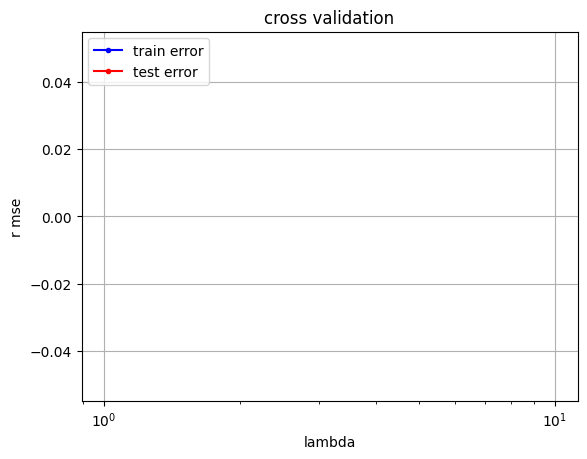

In [14]:
#Here : problems NaN with cross_validation... Possible solutions : réduire le pas gamma ? ajouter un tout petit epsilon pour eviter la division par 0, verifier qu'on introduit pas un NaN avec la data

new_size = np.sum(degrees_poly)  +1  #size of the new input data 
initial_w = np.ones([new_size,1]) 
best_lambda, best_rmse = cross_validation_demo(y_tr, phi, 7, 4,initial_w,  np.logspace(-4, 0, 30), 3 ,gamma, max_iters ) #test for the best lambda, in the matrix expanded


In [15]:
#Calculate the weights for the best lambda, with the train data
gamma = 0.2
w_opt,loss = reg_logistic_regression(y_tr, phi, best_lambda, initial_w, max_iters, gamma)

print (w_opt)

[[-1.06472685e-01]
 [-1.06472685e-01]
 [-1.06472685e-01]
 [-1.06472685e-01]
 [-1.06472685e-01]
 [-1.06472685e-01]
 [-1.06472685e-01]
 [-1.06472685e-01]
 [-1.06472685e-01]
 [-4.17712859e-02]
 [-4.64436815e-02]
 [-1.41571472e-01]
 [-5.30682918e-02]
 [-1.03907369e+00]
 [ 3.15058955e-02]
 [-8.27562533e-02]
 [ 5.14510335e-02]
 [ 9.51158185e-02]
 [ 7.77306059e-01]
 [ 8.01573938e-02]
 [-3.32631156e-01]
 [-4.36439159e-01]
 [-9.73980085e-01]
 [ 8.35438541e-01]
 [-1.14877249e-02]
 [ 9.27403139e-03]
 [-2.44979588e-02]
 [ 4.04018073e-01]
 [ 2.65150133e+00]
 [-3.59090165e-02]
 [-7.60500948e-02]
 [-7.01379215e-02]
 [-1.94920714e-01]
 [-2.04418633e-01]
 [-3.43015253e-02]
 [-1.22619377e-02]
 [ 4.33120797e-01]
 [ 8.69125734e-03]
 [-9.80816758e-02]
 [ 7.71276180e-02]
 [-2.43540122e-01]
 [ 6.01631508e-01]
 [ 2.66310225e-02]
 [-9.38753938e-02]
 [-8.90936269e-02]
 [-1.85042422e-01]
 [-6.29022595e-01]
 [ 8.03596913e-03]
 [-2.36148714e-01]
 [-4.97637018e-01]
 [-7.66376492e-01]
 [ 3.80400233e+00]
 [ 8.3230532

In [16]:
degrees_poly = np.array(degrees_poly)
print(degrees_poly.shape)
print (w_opt)

phi_te = np.ones([x_te.shape[0],1]) 
for column in range (1,x_te.shape[1]) :  #shape -1 car degree ne prend pas en compte la colonne de uns
    new_cols = build_poly(x_te[:,column], degrees_poly[column-1])
    phi_te = np.c_[phi_te,new_cols]

(30,)
[[-1.06472685e-01]
 [-1.06472685e-01]
 [-1.06472685e-01]
 [-1.06472685e-01]
 [-1.06472685e-01]
 [-1.06472685e-01]
 [-1.06472685e-01]
 [-1.06472685e-01]
 [-1.06472685e-01]
 [-4.17712859e-02]
 [-4.64436815e-02]
 [-1.41571472e-01]
 [-5.30682918e-02]
 [-1.03907369e+00]
 [ 3.15058955e-02]
 [-8.27562533e-02]
 [ 5.14510335e-02]
 [ 9.51158185e-02]
 [ 7.77306059e-01]
 [ 8.01573938e-02]
 [-3.32631156e-01]
 [-4.36439159e-01]
 [-9.73980085e-01]
 [ 8.35438541e-01]
 [-1.14877249e-02]
 [ 9.27403139e-03]
 [-2.44979588e-02]
 [ 4.04018073e-01]
 [ 2.65150133e+00]
 [-3.59090165e-02]
 [-7.60500948e-02]
 [-7.01379215e-02]
 [-1.94920714e-01]
 [-2.04418633e-01]
 [-3.43015253e-02]
 [-1.22619377e-02]
 [ 4.33120797e-01]
 [ 8.69125734e-03]
 [-9.80816758e-02]
 [ 7.71276180e-02]
 [-2.43540122e-01]
 [ 6.01631508e-01]
 [ 2.66310225e-02]
 [-9.38753938e-02]
 [-8.90936269e-02]
 [-1.85042422e-01]
 [-6.29022595e-01]
 [ 8.03596913e-03]
 [-2.36148714e-01]
 [-4.97637018e-01]
 [-7.66376492e-01]
 [ 3.80400233e+00]
 [ 8.3

In [17]:
print(phi_te.shape)
print(phi.shape)
print(degrees_poly)


(200, 168)
(800, 168)
[8 5 5 5 5 5 3 5 5 5 5 5 6 2 5 6 8 5 6 8 3 8 5 8 5 6 8 3 6 8]


In [33]:
temporary = sigmoid(phi_te@w_opt)
y_result = temporary
y_result[y_result>0.5] = 1
y_result[y_result<0.5] = 0
accuracy, precision, recall = get_accuracy(y_result, y_te)


How well our model can classify binary outcomes: accuracy of 0.565 precision of 0.622, and recall of 0.700


In [34]:
# trying classification : KNN
K = 20
y_resultKNN = np.zeros((y_te.shape[0],1))
for i in range (x_te.shape[0]):
    Kneighbors, Kindexes = get_Kneighbors(x_tr, K, x_te[i,:])
    _, new_prediction = get_prediction(Kindexes, K, y_tr) 
    y_resultKNN[i] = new_prediction
    
accuracy, precision, recall = get_accuracy(y_resultKNN, y_te)


How well our model can classify binary outcomes: accuracy of 0.600 precision of 0.592, and recall of 0.326


In [26]:
#auc
from sklearn import metrics
auc = metrics.roc_auc_score(y_te, y_result)
aucKNN = metrics.roc_auc_score(y_te, y_resultKNN)

#print AUC score
print(auc, aucKNN)

0.5444739462329904 0.48888151344175235
